In [1]:
# Import libraries

# First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

# Pandas for data handling
import pandas # https://pandas.pydata.org/

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib for visualization
import matplotlib.pyplot as pl  # https://matplotlib.org/

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


Loading data...
done 



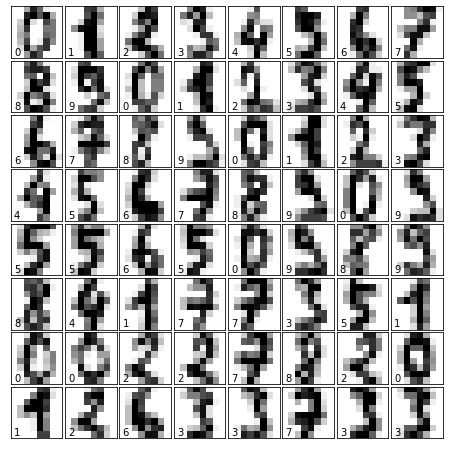

In [2]:
print('Loading data...')  # Now let's load the data
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

# let's plot to see what the data looks like
fig = pl.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=pl.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
    
    
# Test dataset is already split from the rest
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=42)

print('done \n')

In [3]:
# We'll focus on accuracy as both formative and summative scoring method
scoring = 'f1_macro'

In [4]:
# Now it is time to tune some models on the training data and estimate their accuracy on unseen test data.

In [5]:
# k Nearest Neighbors
print('Tuning model...')
selected_model = KNeighborsClassifier()
hyperparameters = {'n_neighbors':[4, 5, 6], 'weights':['uniform', 'distance'] }
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)
print("Best hyperparameters found on development set for k Nearest Neighbors:")
print(clf.best_params_)
tuned_model_kNN = clf.best_estimator_

y_pred = tuned_model_kNN.predict(X_test)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )

Tuning model...
Best hyperparameters found on development set for k Nearest Neighbors:
{'n_neighbors': 4, 'weights': 'distance'}
f1_score is
0.9890269404306036


In [6]:
# Decision Tree
print('Tuning model...')
selected_model = DecisionTreeClassifier()
hyperparameters = {'max_depth':[5, 6, 7], 'criterion':['gini', 'entropy'] }
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)
print("Best hyperparameters found on development set for Decision Tree:")
print(clf.best_params_)
tuned_model_DT = clf.best_estimator_

print(f'Decision tree has maximum depth {tuned_model_DT.tree_.max_depth}.')
y_pred = tuned_model_DT.predict(X_test)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )

Tuning model...
Best hyperparameters found on development set for Decision Tree:
{'criterion': 'entropy', 'max_depth': 6}
Decision tree has maximum depth 6.
f1_score is
0.8533977598095539


In [7]:
# Random Forest
print('Tuning model...')
selected_model = RandomForestClassifier()
hyperparameters = {'max_depth':[3, 4, 5], 'criterion':['gini', 'entropy'], 'n_estimators':[10, 50, 100] }
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)
print("Best hyperparameters found on development set for Random Forest:")
print(clf.best_params_)
tuned_model_RF = clf.best_estimator_

y_pred = tuned_model_RF.predict(X_test)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )

Tuning model...
Best hyperparameters found on development set for Random Forest:
{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
f1_score is
0.9508304670549788


In [8]:
# Gradient Boosting
print('Tuning model...')
selected_model = GradientBoostingClassifier()
hyperparameters = {'max_depth':[3, 4, 5] }
clf = GridSearchCV(selected_model, hyperparameters, cv=5, scoring=scoring)
clf.fit(X_train, y_train)
print("Best hyperparameters found on development set for Gradient Boosting:")
print(clf.best_params_)
tuned_model_GB = clf.best_estimator_

y_pred = tuned_model_GB.predict(X_test)
print( 'f1_score is')
print( f1_score(y_test, y_pred, average='macro') )

print('done \n')

Tuning model...
Best hyperparameters found on development set for Gradient Boosting:
{'max_depth': 3}
f1_score is
0.970481635195543
done 

